In [5]:
import pandas as pd

In [43]:
files = ["./data/orochi_data/clapping.txt",
         "./data/orochi_data/fingersnap.txt",]

dfs = []

for idx, file in enumerate(files):
    with open(file, "r") as f:
        lines = f.readlines()
        df = pd.DataFrame([x.split() for x in lines[0:120]])
        df.drop(columns=[0, 1, 2, 8, 9], inplace=True)
        # add another column with the file name
        df["gesture"] = idx
        df.columns = ["f1", "f2", "f3", "f4", "f5", "gesture"]
        dfs.append(df)

In [44]:
df = pd.DataFrame()
for d in dfs:
    df = pd.concat([df, d], ignore_index=True)
    
X = df[["f1", "f2", "f3", "f4", "f5"]]
y = df["gesture"]

In [45]:
# convert X from hex string to int
X = X.map(lambda x: int(x, 16))

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(8, activation='relu', input_shape=(5,), name="hidden"),
    Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)


Epoch 1/40


c:\Pyth\radarobj_detection\radarml\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.4511 - loss: 27.4237 - val_accuracy: 0.6154 - val_loss: 23.1960
Epoch 2/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4333 - loss: 27.8237 - val_accuracy: 0.6154 - val_loss: 22.5075
Epoch 3/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4229 - loss: 26.9527 - val_accuracy: 0.6154 - val_loss: 21.8247
Epoch 4/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4637 - loss: 24.0787 - val_accuracy: 0.6154 - val_loss: 21.1439
Epoch 5/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4989 - loss: 21.9608 - val_accuracy: 0.6154 - val_loss: 20.4705
Epoch 6/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4290 - loss: 24.3976 - val_accuracy: 0.6154 - val_loss: 19.7860
Epoch 7/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4854 - loss: 21.1707 - val_accuracy: 0.6154 - val_loss: 19.1180
Epoch 8/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4468 - loss: 22.0861 - val_accuracy: 0.6154 - val_loss: 18.

In [110]:
from sklearn.metrics import classification_report

targets = ['clapping', 'fingersnap']

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # convert from probabilities to class indices

# Print report
print(classification_report(y_test, y_pred_classes, target_names=targets))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
              precision    recall  f1-score   support

    clapping       0.88      0.96      0.92        24
  fingersnap       0.95      0.88      0.91        24

    accuracy                           0.92        48
   macro avg       0.92      0.92      0.92        48
weighted avg       0.92      0.92      0.92        48



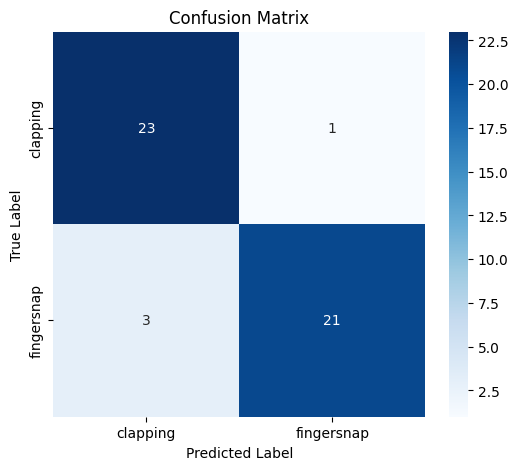

In [111]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=targets,
            yticklabels=targets)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.show()


In [112]:
model.weights

[<Variable path=sequential_20/hidden/kernel, shape=(5, 8), dtype=float32, value=[[-0.18802252 -0.4352462   0.08307279 -0.59939307 -0.02288586  0.33559996
    0.41823626  0.0705823 ]
  [-0.08691341 -0.0275948  -0.5529592   0.3154595  -0.07883286  0.08337277
    0.16278839  0.43133557]
  [-0.04100844 -0.03903365  0.24792004 -0.24333543 -0.47617027 -0.6865378
   -0.40528044  0.10516849]
  [-0.5970718   0.50400376  0.63237906 -0.39719296  0.5963702   0.43332452
   -0.19387713 -0.3541199 ]
  [ 0.30249056 -0.6427063  -0.37772843 -0.55026263 -0.48345518  0.48443985
   -0.17874736  0.5163948 ]]>,
 <Variable path=sequential_20/hidden/bias, shape=(8,), dtype=float32, value=[-0.16414867  0.         -0.00135555  0.          0.         -0.161734
   0.          0.22851941]>,
 <Variable path=sequential_20/dense_20/kernel, shape=(8, 2), dtype=float32, value=[[ 0.05625232  0.45814127]
  [-0.23411292  0.32450604]
  [ 0.35811186 -0.53194284]
  [ 0.27279282 -0.01519698]
  [ 0.20833367  0.30981123]
  [ 0.0

In [116]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical

def evaluate_custom_mlp(X, y, weights_dict, is_categorical=False, shape=(5, 8, 2)):
    """
    Evaluate accuracy of a manually-weighted MLP model.

    Parameters:
        X (np.ndarray): Input data, shape (num_samples, 4)
        y (np.ndarray): Labels, shape (num_samples,) or one-hot (num_samples, 3)
        weights_dict (dict): Dictionary with keys:
            'input_hidden_weights', 'hidden_biases',
            'hidden_output_weights', 'output_biases'
        is_categorical (bool): Set True if y is one-hot encoded

    Returns:
        float: Accuracy score
    """

    # 1. Build model with matching architecture
    model = Sequential([
        Dense(shape[1], input_shape=(shape[0],), activation='relu', name='hidden'),
        Dense(shape[2], activation='softmax', name='output')
    ])

    # 2. Set custom weights
    model.get_layer('hidden').set_weights([
        np.array(weights_dict['input_hidden_weights']),
        np.array(weights_dict['hidden_biases'])
    ])

    model.get_layer('output').set_weights([
        np.array(weights_dict['hidden_output_weights']),
        np.array(weights_dict['output_biases'])
    ])

    # 3. Get predictions
    predictions = model.predict(X)
    predicted_classes = np.argmax(predictions, axis=1)

    # 4. Process ground truth
    if is_categorical:
        true_classes = np.argmax(y, axis=1)
    else:
        true_classes = y

    # 5. Compute accuracy
    accuracy = accuracy_score(true_classes, predicted_classes)
    return accuracy


```
weights = {
  "input_hidden_weights" : [[-0.18802252, -0.4352462, 0.08307279, -0.59939307, -0.02288586, 0.33559996, 0.41823626,  0.0705823 ],
                              [-0.08691341, -0.0275948, -0.5529592, 0.3154595, -0.07883286, 0.08337277, 0.16278839, 0.43133557],
                              [-0.04100844, -0.03903365, 0.24792004, -0.24333543, -0.47617027, -0.6865378, -0.40528044, 0.10516849],
                              [-0.5970718, 0.50400376, 0.63237906, -0.39719296, 0.5963702, 0.43332452, -0.19387713, -0.3541199],
                              [0.30249056, -0.6427063, -0.37772843, -0.55026263, -0.48345518, 0.48443985, -0.17874736, 0.5163948]],
  "hidden_biases" : [-0.16414867,  0, -0.00135555,  0, 0, -0.161734, 0, 0.22851941],
  "hidden_output_weights" : [[0.05625232, 0.45814127,],
                              [-0.23411292, 0.32450604],
                              [0.35811186, -0.53194284],
                              [0.27279282, -0.01519698],
                              [0.20833367, 0.30981123],
                              [0.01680527, 0.37714186],
                              [0.5956143, 0.3958844 ],
                              [-0.34023762, -0.99783444]],
    "output_biases" : [0.1852224, -0.1852224]
}
```

In [117]:
weights = {
  "input_hidden_weights" : [[-0.19, -0.44, 0.08, -0.6, -0.02, 0.34, 0.42,  0.07 ],
                              [-0.09, -0.03, -0.55, 0.32, -0.08, 0.08, 0.16, 0.43],
                              [-0.04, -0.04, 0.25, -0.24, -0.48, -0.69, -0.41, 0.11],
                              [-0.6, 0.50, 0.63, -0.4, 0.6, 0.43, -0.19, -0.35],
                              [0.30, -0.64, -0.38, -0.55, -0.48, 0.48, -0.18, 0.52]],
  "hidden_biases" : [-0.16,  0, -0.01,  0, 0, -0.16, 0, 0.23],
  "hidden_output_weights" : [[0.056, 0.46,],
                              [-0.23, 0.32],
                              [0.36, -0.53],
                              [0.27, -0.02],
                              [0.21, 0.31],
                              [0.02, 0.38],
                              [0.6, 0.4 ],
                              [-0.34, -0.1]],
    "output_biases" : [0.19, -0.19]
}

accuracy = evaluate_custom_mlp(X, y, weights, is_categorical=False)
print("Accuracy:", accuracy)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Accuracy: 0.5
